In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875


In [3]:
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,33058,33064,33114,33118,33308,33354,33447,33516,33561,33614
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9304,9406,9500,9585,9675,9762,9864,9957,10001,10071
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37067,37170,37170,37382,37492,37603,37603,37856,37971,38088
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1814,1814,1814,1928,1928,2011,2011,2057,2057,2057
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2685,2716,2743,2744,2761,2801,2928,3012,3022,3030


In [4]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1472,1473,1477,1479,1480,1481,1481,1485,1488,1492
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,413,416,420,424,429,434,439,443,448,451
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1789,1795,1801,1809,1818,1827,1827,1841,1846,1856
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,55,55,55,57,57,59,59,59,59,59
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,212,218,218,219,222,227,228,234,241,247


In [5]:
total_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
total_cases.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2020-10-19 11:24:57,33.93911,67.709953,40287.0,1497.0,33760.0,5030.0,103.490154,NaN,NaN,3.715839,4,AFG
1,Albania,2020-10-19 11:24:57,41.15330,20.168300,17055.0,451.0,10071.0,6533.0,592.640211,NaN,NaN,2.644386,8,ALB
2,Algeria,2020-10-19 11:24:57,28.03390,1.659600,54402.0,1856.0,38088.0,14458.0,124.060903,NaN,NaN,3.411639,12,DZA
3,Andorra,2020-10-19 11:24:57,42.50630,1.521800,3377.0,59.0,2057.0,1261.0,4370.672361,NaN,NaN,1.747113,20,AND
4,Angola,2020-10-19 11:24:57,-11.20270,17.873900,7622.0,247.0,3030.0,4345.0,23.190951,NaN,NaN,3.240619,24,AGO


In [6]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Columns: 275 entries, Province/State to 10/18/20
dtypes: float64(2), int64(271), object(2)
memory usage: 573.8+ KB


In [7]:
confirmed["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
confirmed["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Yukon', 'Anhui', 'Beijing', 'Chongqing', 'Fujian',
       'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Martinique', 'Mayotte',
       'New Caledonia', 'Reunion', 'Sai

In [9]:
glob_data = total_cases.copy().drop(['Lat', 'Long_', 'Country_Region', 'Last_Update', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID'], axis =1) 
glob_t = pd.DataFrame(glob_data.sum()).transpose() 
glob_t.style.format("{:,.0f}")

,Confirmed,Deaths,Recovered,Active
0,"40,088,893","1,114,391","27,525,530","11,449,118"


In [14]:
import covsirphy as cs
cs.get_version()

'CovsirPhy v2.8.3'

In [11]:
confirmed_agg_ts = confirmed.copy().drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis =1).sum()

death_agg_ts = deaths.copy().drop(['Lat','Long', 'Country/Region', 'Province/State' ],axis =1).sum() 

recovered_agg_ts = recovered.copy ().drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis =1). sum()

#There is no time series data for Active cases, therefore it needs to be engineered separately

active_agg_ts = pd.Series(data = np.array([x1 - x2 - x3 for (x1, x2, x3) in zip(confirmed_agg_ts.values, death_agg_ts.values, recovered_agg_ts.values)]), index= confirmed_agg_ts.index)

#Plot and add traces for all the aggregated timeseries

In [12]:
total_cases.copy().drop(['Lat', 'Long_', 'Last_Update', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'], axis =1).sort_values ('Confirmed', ascending=False).reset_index(drop=True).style.bar(align = "left", width = 98, color = '#d65f5f')

,Country_Region,Confirmed,Deaths,Recovered,Active
0,US,8.15589e+06,219679,3.23414e+06,4.70208e+06
1,India,7.55027e+06,114610,6.66361e+06,772055
2,Brazil,5.22436e+06,153675,4.52639e+06,544294
3,Russia,1.4065e+06,24212,1.0709e+06,311542
4,Argentina,989680,26267,803965,159448
5,Colombia,959572,28970,858294,72308
6,France,938606,33499,108749,796358
7,Spain,936560,33775,150376,752409
8,Peru,868675,33759,779779,55137
9,Mexico,851227,86167,720973,44087


In [13]:
confirmed_India = confirmed[confirmed['Country/Region'] == "India"]

confirmed_India = confirmed_India.drop(['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

deaths_India = deaths[deaths['Country/Region'] == "India"]

deaths_India = deaths_India.drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis=1).reset_index(drop = True). sum()

recovered_India = recovered[recovered['Country/Region'] == "India"]

recovered_India = recovered_India.drop(['Lat', 'Long','Country/Region', 'Province/State'], axis =1).reset_index(drop= True). sum()

active_India = pd.Series(
    data = np.array(
        [x1 - x2 - x3 for (x1, x2, x3) in zip(confirmed_India.values, 
                                              deaths_India.values, 
                                              recovered_India.values
                                             )
        ]
),

index = confirmed_India.index
)

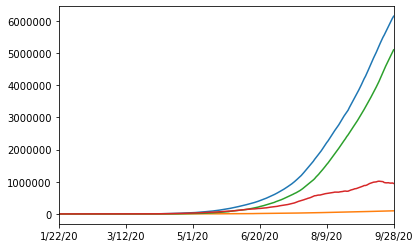

In [14]:
ax = confirmed_India.plot()

ax = deaths_India.plot(ax = ax)

ax = recovered_India.plot(ax = ax)

active_India.plot(x = "Date", y = "Cases_Count", ax = ax)

In [15]:
def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
    new_index = self.extend_index(data.index, self.predict_range)
    size = len(new_index)
    
    def SIR(t, y):
        S = y[0]

        I = y[1]

        R = y[2]

        return (-beta*S*I, beta*S*I-gamma*I, gamma*I)

    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values)))) 
    extended_recovered = np.concatenate((recovered. values, [None] * (size - len( recovered.values))))

    extended_death = np.concatenate( (death.values, [None]* (size - len(death.values))))
    return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0],

t_eval = np.arange(0,size, 1))

In [16]:
def train(self):

    recovered = self.load_recovered(self.country) 
    death = self.load_dead(self.country)

    data = (self_load_confirmed (self.country) - recovered - death)

    optimal = minimize(loss, [0.001,0.001], args= (data, recovered, self.s_0, self.i_0, self.r_0), method="L-BFGS-B", bounds = [(0.00000001, 0.4), (0.00000001, 0.4)])

    print (optimal)

    beta, gamma = optimal.x

    new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0,self.r_0)

    df = pd.DataFrame ({'Infected data' : extended_actual, 'Recovered data': extended_recovered, 'Death data': extended_death, 'Susceptible': prediction.y[0], 'Infected': prediction.y[1], 'Recovered': prediction.y[2]}, index=new_index)

    #save results to csv

    df.to_csv (f"{self.country}.csv")

    fig, ax = plt.subplots (figsize=(15,10))

    ax.set_title(self.country)

    df.plot(ax=ax)


    print (f"country={self.country}, beta={beta:.8f}, gamma={gamma: .8f}, r_0:{(beta/gamma):.8f}")

    fig.savefig(f"{self.country}.png")

In [17]:
def loss(point, data, recovered, s_0, i_0, r_0):

    size = len(data)

    beta, gamma = point

    def SIR(t, y):

        S = Y[0]

        I = [1]

        R = Y[2]

        return [-beta *S * I, beta *S*I-gamma*I, gamma*1]

    solution = solve_ivp(SIR, [0, size], [s_0, i_0,r_0], t_eval=np.arange (0, size, 1), vectorized=True) 
    l1=np.sqrt(np.mean((solution.y[1] - data)**2))

    l2 = np.sqrt(np.mean( (solution.y[2] - recovered)**2))

    alpha = 0.1

    return alpha * l1 + (1 - alpha) * 12

In [18]:
predict()

TypeError: predict() missing 10 required positional arguments: 'self', 'beta', 'gamma', 'data', 'recovered', 'death', 'country', 's_0', 'i_0', and 'r_0'

In [24]:
#!/usr/bin/python
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import argparse
import sys
import json
import ssl
import urllib.request

In [25]:
def parse_arguments():
    parser = argparse.ArgumentParser()
    
    parser.add_argument(
        '--countries',
        action='store',
        dest='countries',
        help='Countries on CSV format. ' +
        'It must exact match the data names or you will get out of bonds error.',
        metavar='COUNTRY_CSV',
        type=str,
        default="")
    
    parser.add_argument(
        '--download-data',
        action='store_true',
        dest='download_data',
        help='Download fresh data and then run',
        default=False
    )

    parser.add_argument(
        '--start-date',
        required=False,
        action='store',
        dest='start_date',
        help='Start date on MM/DD/YY format ... I know ...' +
        'It defaults to first data available 1/22/20',
        metavar='START_DATE',
        type=str,
        default="1/22/20")

    parser.add_argument(
        '--prediction-days',
        required=False,
        dest='predict_range',
        help='Days to predict with the model. Defaults to 150',
        metavar='PREDICT_RANGE',
        type=int,
        default=150)

    parser.add_argument(
        '--S_0',
        required=False,
        dest='s_0',
        help='S_0. Defaults to 100000',
        metavar='S_0',
        type=int,
        default=100000)

    parser.add_argument(
        '--I_0',
        required=False,
        dest='i_0',
        help='I_0. Defaults to 2',
        metavar='I_0',
        type=int,
        default=2)

    parser.add_argument(
        '--R_0',
        required=False,
        dest='r_0',
        help='R_0. Defaults to 0',
        metavar='R_0',
        type=int,
        default=10)

    args = parser.parse_args()

    country_list = []
    if args.countries != "":
        try:
            countries_raw = args.countries
            country_list = countries_raw.split(",")
        except Exception:
            sys.exit("QUIT: countries parameter is not on CSV format")
    else:
        sys.exit("QUIT: You must pass a country list on CSV format.")

    return (country_list, args.download_data, args.start_date, args.predict_range, args.s_0, args.i_0, args.r_0)


In [26]:
def sumCases_province(input_file, output_file):
    with open(input_file, "r") as read_obj, open(output_file,'w',newline='') as write_obj:
        csv_reader = reader(read_obj)
        csv_writer = writer(write_obj)
               
        lines=[]
        for line in csv_reader:
            lines.append(line)    

        i=0
        ix=0
        for i in range(0,len(lines[:])-1):
            if lines[i][1]==lines[i+1][1]:
                if ix==0:
                    ix=i
                lines[ix][4:] = np.asfarray(lines[ix][4:],float)+np.asfarray(lines[i+1][4:] ,float)
            else:
                if not ix==0:
                    lines[ix][0]=""
                    csv_writer.writerow(lines[ix])
                    ix=0
                else:
                    csv_writer.writerow(lines[i])
            i+=1 

In [27]:
def download_data(url_dictionary):
    #Lets download the files
    for url_title in url_dictionary.keys():
        urllib.request.urlretrieve(url_dictionary[url_title], "./data/" + url_title)


In [28]:
def load_json(json_file_str):
    # Loads  JSON into a dictionary or quits the program if it cannot.
    try:
        with open(json_file_str, "r") as json_file:
            json_variable = json.load(json_file)
            return json_variable
    except Exception:
        sys.exit("Cannot open JSON file: " + json_file_str)

In [29]:
class Learner(object):
    def __init__(self, country, loss, start_date, predict_range,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0


    def load_confirmed(self, country):
        df = pd.read_csv('data/time_series_19-covid-Confirmed-country.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_recovered(self, country):
        df = pd.read_csv('data/time_series_19-covid-Recovered-country.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_dead(self, country):
        df = pd.read_csv('data/time_series_19-covid-Deaths-country.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
    

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))


    def train(self):
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
        print(optimal)
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Infected data': extended_actual, 'Recovered data': extended_recovered, 'Death data': extended_death, 'Susceptible': prediction.y[0], 'Infected': prediction.y[1], 'Recovered': prediction.y[2]}, index=new_index)
        
        df.to_csv(f"{self.country}.csv")
        
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"country={self.country}, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        fig.savefig(f"{self.country}.png")

In [30]:
def main():

    countries, download, startdate, predict_range, s_0, i_0, r_0 = parse_arguments()

    if download:
        data_d = load_json("./data_url.json")
        download_data(data_d)

    sumCases_province('data/time_series_19-covid-Confirmed.csv', 'data/time_series_19-covid-Confirmed-country.csv')
    sumCases_province('data/time_series_19-covid-Recovered.csv', 'data/time_series_19-covid-Recovered-country.csv')
    sumCases_province('data/time_series_19-covid-Deaths.csv', 'data/time_series_19-covid-Deaths-country.csv')


    for country in countries:
        learner = Learner(country, loss, startdate, predict_range, s_0, i_0, r_0)
        #try:
        learner.train()

In [31]:
if __name__ == '__main__':
    main() 

usage: ipykernel_launcher.py [-h] [--countries COUNTRY_CSV] [--download-data]
                             [--start-date START_DATE]
                             [--prediction-days PREDICT_RANGE] [--S_0 S_0]
                             [--I_0 I_0] [--R_0 R_0]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\HP\AppData\Roaming\jupyter\runtime\kernel-1fc911c1-254a-4211-adbd-b15ab61374d5.json


SystemExit: 2

c:\python\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [2]:
India_SIR = pd.read_csv("Japan.csv") 
print(India_SIR.columns) 
print (India_SIR.shape)

India_SIR1 = India_SIR[:77]
India_SIR

Index(['Unnamed: 0', 'Infected data', 'Recovered data', 'Death data',
       'Susceptible', 'Infected', 'Recovered'],
      dtype='object')
(251, 7)


,Unnamed: 0,Infected data,Recovered data,Death data,Susceptible,Infected,Recovered
0,1/22/20,2.0,0.0,0.0,100000.000000,2.000000,10.000000
1,1/23/20,2.0,0.0,0.0,99999.818483,2.118521,10.062996
2,1/24/20,2.0,0.0,0.0,99999.626210,2.244066,10.129725
3,1/25/20,2.0,0.0,0.0,99999.422502,2.377076,10.200422
4,1/26/20,3.0,1.0,0.0,99999.206659,2.518010,10.275332
...,...,...,...,...,...,...,...
246,9/24/20,6884.0,72066.0,1540.0,13222.372834,16636.769579,70152.857587
247,9/25/20,6494.0,73016.0,1544.0,13029.815186,16324.663693,70657.521121
248,9/26/20,6479.0,73677.0,1547.0,12843.790261,16015.617455,71152.592284
249,9/27/20,6960.0,73677.0,1549.0,12664.157966,15709.677024,71638.165010


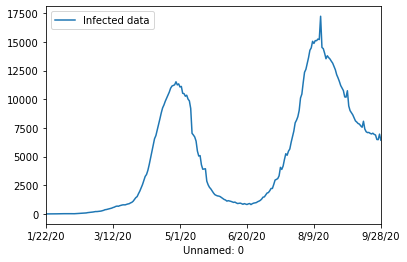

In [4]:
ax = India_SIR.plot(x = "Unnamed: 0", y = "Infected data")